In [4]:
#-- THIS MODEL IS A CASE STUDY OF A TELCO IN INDIA
#-- OUR AI PROTOTYPE WILL BE TRAINED ON THIS DATASET

import pyforest
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

from pylab import rcParams
%matplotlib inline

# Loading the CSV with pandas
data = pd.read_csv('customer-churn.csv')


In [5]:
data.head()

# Exploring the dataset 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape

(7043, 21)

In [10]:
data.info()

# There are 7043 rows and 21 columns. 
# There are only 3 numeric features and the rest are all categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [11]:
# Checking for missing values.
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Descriptive Statistics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


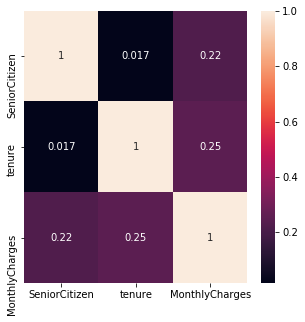

In [15]:
sns.heatmap(corr, annot=True)

In [16]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

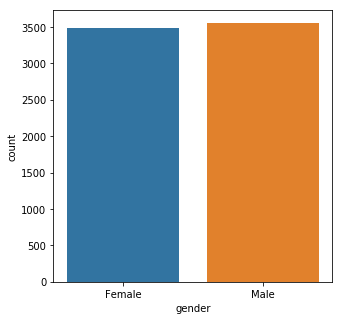

In [18]:
sns.countplot(x='gender', data=data)

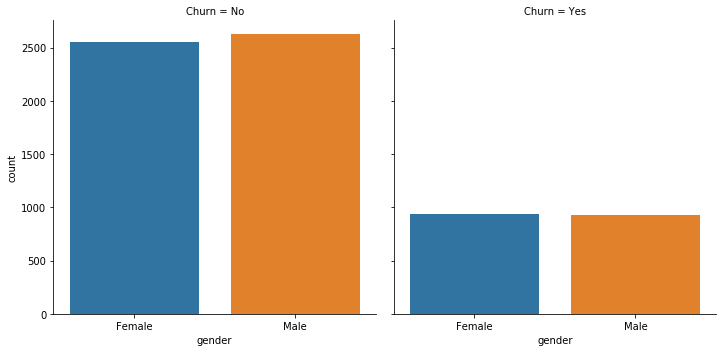

In [19]:
sns.factorplot(x='gender', col='Churn', kind='count', data=data)

# No relation between gender and churn. From the graph it is visible 
# that both male and female are equally distributed. Therefore no impact of gender on churn.

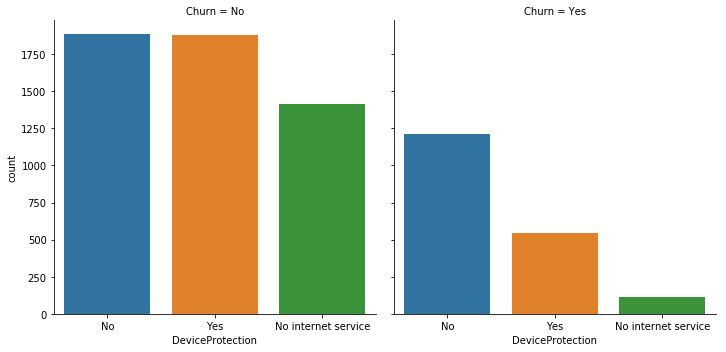

In [21]:
sns.factorplot(x='DeviceProtection', col='Churn', kind='count', data=data)

# When it comes to device protection, it doesn't give any insight about customer who are staying back. 

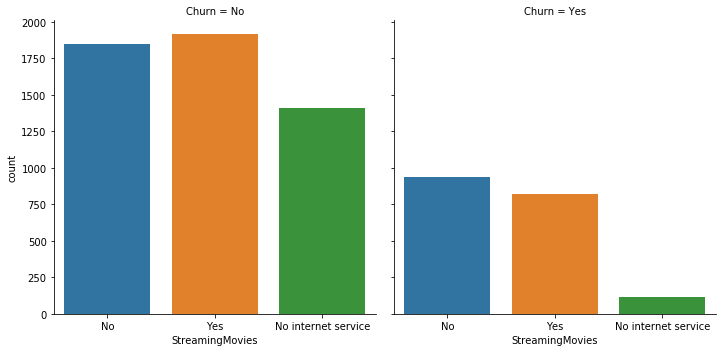

In [23]:
sns.factorplot(x='StreamingMovies', col='Churn', kind='count', data=data)

# From, the graph we can say that streaming movies and tv 
# is not the deciding factor for the customer to decide whether to churn or not.

No     5174
Yes    1869
Name: Churn, dtype: int64

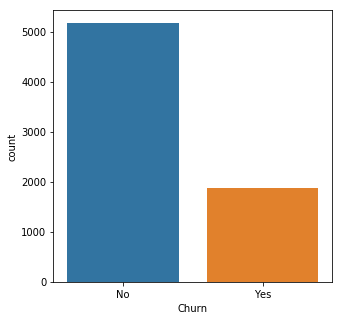

In [25]:
sns.countplot(x="Churn", data=data)
data.Churn.value_counts()

In [27]:
cat_df = data[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]
cat_df.shape

(7043, 16)

In [28]:
cat_cols = pd.get_dummies(cat_df, drop_first=True)
cat_cols.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [29]:
num_df = data.drop(['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'], axis=1)
num_df.shape

(7043, 5)

In [30]:
dataset = pd.concat([num_df,cat_cols], axis=1 )

# Merging dummified and categorical columns.

In [31]:
dataset.shape

(7043, 32)

In [32]:
# Taking care of object dtype

dataset['TotalCharges'][dataset['TotalCharges']==' ']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [33]:
dataset = dataset.drop(labels = list(dataset.TotalCharges[dataset.TotalCharges == " "].index))

In [34]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

In [35]:
y = dataset["Churn_Yes"].values

X = dataset.drop(['Churn_Yes','customerID'], axis=1)

In [64]:
from sklearn.model_selection import train_test_split

features_train, features_test, label_train, label_test = train_test_split(X, y, test_size=0.33, random_state=101,stratify=y)

In [65]:
#------------------------------------------------------------------------------------------#

In [66]:
# Importing the packages for Decision Tree Classifier

from sklearn import tree

model_one = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=101, min_samples_leaf=3, class_weight="balanced")
model_one

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [67]:
# Fit the decision tree model on your features and label

model_one = model_one.fit(features_train, label_train)

In [68]:
# The feature_importances_ attribute make it simple to interpret the significance of the predictors you include

list(zip(X_train.columns,model_one.feature_importances_))

[('SeniorCitizen', 0.0),
 ('tenure', 0.0),
 ('MonthlyCharges', 0.0814628292870132),
 ('TotalCharges', 0.01866862457835374),
 ('gender_Male', 0.0),
 ('Partner_Yes', 0.0),
 ('Dependents_Yes', 0.0),
 ('PhoneService_Yes', 0.0),
 ('MultipleLines_No phone service', 0.0),
 ('MultipleLines_Yes', 0.0),
 ('InternetService_Fiber optic', 0.12441593937320512),
 ('InternetService_No', 0.0),
 ('OnlineSecurity_No internet service', 0.0),
 ('OnlineSecurity_Yes', 0.0),
 ('OnlineBackup_No internet service', 0.0),
 ('OnlineBackup_Yes', 0.0),
 ('DeviceProtection_No internet service', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('TechSupport_No internet service', 0.0),
 ('TechSupport_Yes', 0.0),
 ('StreamingTV_No internet service', 0.0),
 ('StreamingTV_Yes', 0.0),
 ('StreamingMovies_No internet service', 0.0),
 ('StreamingMovies_Yes', 0.0),
 ('Contract_One year', 0.28030027287483444),
 ('Contract_Two year', 0.4830502656776943),
 ('PaperlessBilling_Yes', 0.0),
 ('PaymentMethod_Credit card (automatic)', 0.0),
 ('P

In [71]:
# Importing the package for Logistic Regression

from sklearn.linear_model import LogisticRegression

model_two = LogisticRegression()
result = model_two.fit(features_train, label_train)

In [72]:
from sklearn import metrics

prediction_two = model_two.predict(features_test)

# Print the prediction accuracy
print (metrics.accuracy_score(label_test, prediction_two))

0.8061180525635502


In [73]:
# To get the weights of all the variables

weights = pd.Series(model_two.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

InternetService_Fiber optic              0.671727
PaperlessBilling_Yes                     0.400124
MultipleLines_No phone service           0.344807
SeniorCitizen                            0.284552
PaymentMethod_Electronic check           0.187454
StreamingMovies_Yes                      0.158916
StreamingTV_Yes                          0.149413
MultipleLines_Yes                        0.122800
Partner_Yes                              0.084830
MonthlyCharges                           0.006246
TotalCharges                             0.000364
DeviceProtection_Yes                    -0.064290
tenure                                  -0.069084
gender_Male                             -0.069269
PaymentMethod_Mailed check              -0.077087
OnlineSecurity_No internet service      -0.078907
InternetService_No                      -0.078907
DeviceProtection_No internet service    -0.078907
TechSupport_No internet service         -0.078907
StreamingTV_No internet service         -0.078907


In [77]:
features_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6544,1,42,104.75,4323.45,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0
1297,0,5,75.60,402.50,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3533,0,10,19.80,198.25,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
315,0,51,110.05,5686.40,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0
4504,0,37,20.15,785.75,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0


In [80]:
label_train

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [76]:
# Importing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_three = RandomForestClassifier(class_weight="balanced")
output = model_three.fit(features_train, label_train)

In [78]:
prediction_three = model_three.predict(features_test)

# Print the prediction accuracy
print (metrics.accuracy_score(label_test, prediction_two))

0.8061180525635502


In [81]:
from joblib import dump

In [83]:
dump(model_three, 'churn_80.joblib')

['churn_80.joblib']